# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — проверить гипотезы:

1. Наличие детей у клиента банка имеет влияние на возврат кредита в срок.

2. Семейное положение клиента банка влияет на возврат кредита в срок.

3. Уровень дохода клиента банка влияет на возврат кредита в срок.

4. Различные цели кредита имеют разное влияние на его возврат в срок.

**Ход исследования**

Данные о статистики платёжеспособности клиентов получим из файла `/datasets/data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки исправим самые критичные ошибки. Проверим гипотезы и интерпретируем их. Подведём общий итог.

Таким образом, исследование пройдёт следующие этапы:

* Обзор данных.
* Предобработка данных.
* Проверка гипотез.
* Общий вывод.

##  Общая информация

 Загрузим файл с данными и ознакомимся с ним.

In [1]:
# импорт библиотек
import pandas as pd
from pymystem3 import Mystem
import seaborn

In [2]:
# чтение файла с данными и сохранение в df
# получение первых и последних 10 строк таблицы df
# получение общей информации о данных в таблице df
df = pd.read_csv('/datasets/data.csv')
display(df.head(10))
display(df.tail(10))
df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**  

В таблице двенадцать столбцов. Тип данных  — `int64`, `float64`, `object`.

Согласно документации к данным:

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.  
Общий трудовой стаж в днях (`days_employed`) - имеет тип данных `float64`, есть отрицательные значения.  
Уровень образования клиента (`education`) - строчные буквы сочетаются с прописными.  
Ежемесячный доход (`total_income`) - имеет тип данных `float64`.  

В каждой строке таблицы — данные о платёжеспособности клиента. В колонках предоставляются данные клиентов банка о наличие детей, семейном положении, уровне дохода, наличие задолженности по возврату кредитов, - что должно быть достаточно для проверки поставленных гипотез. Но встречаются пропуски в данных, неподходящий тип данных, артефакты.


Необходимо устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков

In [3]:
# подсчёт пропусков
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Не все пропущенные значения влияют на исследование. Так, в `days_employed` пропуски не важны для вашей работы. И сами данные в этом столбце не поддаются анализу, вероятнее всего, произошёл какой-то сбой, либо ошибка при формировании этих данных в столбце с общим трудовым стажем в днях, т.к. трудовой стаж не может быть отрицательным, исчиляться в сотнях лет, иметь нецелочисленное значение.  
Но, пропуски в `total_income` могут помешать проверке влияния уровня дохода клиента на возврат кредита в срок, тем более, что пропущенные значения составляют чуть больше 10% всех данных.  
При этом, совпадает количество пропусков в этих двух столбцах. Проверим, совпадают ли пропуски в строках. Возможно, ежемесячный доход отсутствует вместе с трудовым стажем, т.к.  у клиента не было работы, не наработался трудовой стаж и, соответственно, отсутствует заработная плата. По этой причине, отсутствующие значения можем заполнить нулями, во избежании потери полезной информации в других строках.

Заменим пропущенные значения в стоблце с заработной платой на медианное значение, выделенное по трём характеристикам: возрасту, образованию, типу занятости. Возраст разобъём на категории.  
Классификацией ВОЗ установлено:
* 18 - 44 лет - молодой возраст `young`;
* 45 - 59 лет - средний возраст `middle`;
* 60 - 74 года - пожилой возраст `elderly`;
* 75 - 90 лет - старческий возраст `senile`;
* старше 90 лет - долгожители `long_livers`.

In [4]:
# создадим функцию для разбиения столбца 'dob_years' на категории
# создадим новый столбец 'dob_years_id' и добавим его в конец таблицы
def dob_years_id(row):
    if row['dob_years'] <= 44:
        return 'молодой'
    elif 44 < row['dob_years'] <= 59:
        return 'средний'
    elif 59 < row['dob_years'] <= 74:
        return 'пожилой'
    elif 74 < row['dob_years'] <= 90:
        return 'старческий'
    else: return 'долгожители'  
df['dob_years_id'] = df.apply(dob_years_id, axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,молодой
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,молодой
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,молодой
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,молодой
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,средний


In [5]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()
df['gender'] = df['gender'].str.lower()
df['income_type'] = df['income_type'].str.lower()
df['purpose'] = df['purpose'].str.lower()

In [6]:
# сгруппируем и вычислим медиану стобца 'total_income' по 3-м характеристикам, подставим эту медиану вместо пустых значений
# остаются два незаполненных значения, заменим их на медиану по двум группам
df['total_income'] = df['total_income'].fillna(df.groupby(['income_type', 'education', 'dob_years_id'])['total_income'].transform('median'))
df['total_income'] = df['total_income'].fillna(df.groupby(['education', 'dob_years_id'])['total_income'].transform('median'))
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dob_years_id           0
dtype: int64

Отсутствующие значения в стобце заработной платы заполнены.

In [7]:
# в столбце 'days_employed' заменим все пропущенные значения на нули
df['days_employed'] = df['days_employed'].fillna(0)
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dob_years_id        0
dtype: int64

Пропусков больше нет.

In [8]:
# возьмём по модулю все отрицательные значения в столбце 'days_employed', доступными математическими методами 
# без подгрузки дополнительных библиотек
df['days_employed'] = (df['days_employed']*df['days_employed'])**0.5
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id
0,1,8437.673028,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875.639453,покупка жилья,молодой
1,1,4024.803754,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080.014102,приобретение автомобиля,молодой
2,0,5623.422610,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885.952297,покупка жилья,молодой
3,3,4124.747207,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628.550329,дополнительное образование,молодой
4,0,340266.072047,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616.077870,сыграть свадьбу,средний


**Вывод**  
Заменены пропущенные данные в столбцах `days_employed` и `total_income`, отрицательные значения в столбце `days_employed` заменены на положительные значения.

### Замена типа данных

В столбцах `days_employed` и `total_income` тип данных `float64`, ковертируем в `int64`.

In [9]:
# перевод типа данных столбцов 'days_employed' и 'total_income'  в целочисленное поле
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dob_years_id        object
dtype: object

**Вывод**  
Количество дней трудового стажа может быть только целочисленным, как и уровень дохода клиента удобнее считать в целочисленных значениях, поэтому преобразуем тип данных в целочисленное поле, методом `astype`, который будет безопасным в текущем случае перевода значений `float64` в `int64`  и более уместным, чем метод `to_numeric()`, т.к. все пропущенные значения уже обработаны и который приведёт к `int32` вместо `int64`.

### Обработка дубликатов

####  Дубликаты

Чтобы учесть все дубликаты в столбцах типа `object`: `education`, `family_status`, `gender`, `income_type`,  `purpose`, -   все символы в строке приведём к нижнему регистру, вызовом метода `lower()`.

In [10]:
# подсчёт явных дубликатов
df.duplicated().sum()

71

In [11]:
# проверим, как выглядят найденные дубликаты
df[df.duplicated(keep=False)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id
120,0,0,46,среднее,1,женат / замужем,0,f,сотрудник,0,136789,высшее образование,средний
520,0,0,35,среднее,1,гражданский брак,1,f,сотрудник,0,136585,сыграть свадьбу,молодой
541,0,0,57,среднее,1,женат / замужем,0,f,сотрудник,0,136789,сделка с подержанным автомобилем,средний
554,0,0,60,среднее,1,женат / замужем,0,m,сотрудник,0,133299,покупка недвижимости,пожилой
680,1,0,30,высшее,0,женат / замужем,0,f,госслужащий,0,165448,покупка жилья для семьи,молодой
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,0,64,среднее,1,женат / замужем,0,f,пенсионер,0,112070,дополнительное образование,пожилой
21032,0,0,60,среднее,1,женат / замужем,0,f,пенсионер,0,112070,заняться образованием,пожилой
21132,0,0,47,среднее,1,женат / замужем,0,f,сотрудник,0,136789,ремонт жилью,средний
21281,1,0,30,высшее,0,женат / замужем,0,f,сотрудник,0,163778,покупка коммерческой недвижимости,молодой


Похоже на реальные дубликаты или задвоение строк, удаляем явные дубликаты.

In [12]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
# проверка на отсутствие дубликатов
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

**Вывод**  
Все символы приведены к нижнему регистру, найдены и удалены явные дубликаты, полностью совпадающие строки.

#### Уникальные значения

Проверим уникальные значения в столбцах типа `object`.

In [13]:
# уникальные значения столбца с количеством детей
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Значения -1 и 20 вызывают вопросы, отрицательного количества детей быть не может, а двадцать детей слишком много для современного мира, но возможно. Вероятно, эти данные внесены с ошибками. Проверим количество этих значений. 

In [14]:
# проверим уникальные значения и их количество, столбца 'children'
df['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Для более корректной статистики исправим эти значения, с предположением, чтоб отрицательное значение и ноль внесены случайно, а сами числа корректны.

In [15]:
# методом 'replace' заменим значения
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Подозрительные значения заменены.

In [16]:
# уникальные значения столбца с уровнем образования
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [17]:
# уникальные значения столбца с семейным статусом
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [18]:
# уникальные значения столбца пола клиента
df['gender'].unique()

array(['f', 'm', 'xna'], dtype=object)

Значение `xna` говорит об отсутствии значения, проверим их количество

In [19]:
# проверим уникальные значения и их количество, столбца 'gender'
df['gender'].value_counts()

f      14174
m       7279
xna        1
Name: gender, dtype: int64

Одно значение, принципиально на статистику не повлияет, заменим на любое значение, например, `m`.

In [20]:
# методом 'replace' заменим значение
df['gender'] = df['gender'].replace('xna', 'm')
df['gender'].value_counts()

f    14174
m     7280
Name: gender, dtype: int64

In [21]:
# уникальные значения столбца типа занятости
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [22]:
# уникальные значения столбца с целями кредита
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Остальные данные вопросов, на текущем этапе, не вызывают.

**Вывод**  
Найдены и удалёны дубликаты и некорректные значения, которые могли повлиять на дальнейшие расчёты и статистические распределения, а, значит, и на итоговые выводы.

### Лемматизация

В столбце `df['purpose']` находятся цели получения кредита, записанные разными способами и формами. Необходимо выделить леммы и отсортировать данные по общим категориям целей получения кредита заёмщиками.

In [23]:
# посмотрим уникальные цели кредита и посчитаем их количество
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Видим однотипные цели, записанные разными наборами слов. Лемматизируем их.  

In [24]:
# Создадим переменную `purpose` со списком ключевых целей кредита.
# С помощью функции `lemmas(text)` создадим словарь,
# составленный из лемматизированных значений столбца `df['purpose']` и заменённых на значения из переменной `purpose`.
# Так же, все значения, связанные с жильём и недвижимостью объединим в одну категорию `недвижимость`.
# Используем метод `.join` и `replace` для удаления из словаря пробелов и отступов.
# импортируем библиотеку с функцией лемматизации на русском языке
# создадим новый категориальный столбец по целям кредитов 'df['purpose_lemma']'
# выведем последние 10 строк

m = Mystem()
def lemmas(text):
    lemma = ' '.join(m.lemmatize(text['purpose']))   
    purpose = ['недвижимость', 'автомобиль', 'образование', 'свадьба', 'жилье']    
    for point in purpose:
        if point in lemma:
            lemma = point
        if point in lemma == 'жилье':
            lemma = 'недвижимость'
    return lemma.replace('\n',' ')
df['purpose_lemma'] = df.apply(lemmas, axis=1)
df.tail(10)

Installing mystem to /Users/alex/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id,purpose_lemma
21444,1,467,28,среднее,1,женат / замужем,0,f,сотрудник,1,109486,заняться образованием,молодой,образование
21445,0,914,42,высшее,0,женат / замужем,0,f,компаньон,0,322807,покупка своего жилья,молодой,недвижимость
21446,0,404,42,высшее,0,гражданский брак,1,f,компаньон,0,178059,на покупку своего автомобиля,молодой,автомобиль
21447,0,373995,59,среднее,1,женат / замужем,0,f,пенсионер,0,153864,сделка с автомобилем,средний,автомобиль
21448,1,2351,37,ученая степень,4,в разводе,3,m,сотрудник,0,115949,покупка коммерческой недвижимости,молодой,недвижимость
21449,1,4529,43,среднее,1,гражданский брак,1,f,компаньон,0,224791,операции с жильем,молодой,недвижимость
21450,0,343937,67,среднее,1,женат / замужем,0,f,пенсионер,0,155999,сделка с автомобилем,пожилой,автомобиль
21451,1,2113,38,среднее,1,гражданский брак,1,m,сотрудник,1,89672,недвижимость,молодой,недвижимость
21452,3,3112,38,среднее,1,женат / замужем,0,m,сотрудник,1,244093,на покупку своего автомобиля,молодой,автомобиль
21453,2,1984,40,среднее,1,женат / замужем,0,f,сотрудник,0,82047,на покупку автомобиля,молодой,автомобиль


In [25]:
# посчитаем количество различных целей кредита
df['purpose_lemma'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_lemma, dtype: int64

**Вывод**  
С помощью библиотеки `pymystem3` выделили `4` основные леммы категорий целей для получения кредита, записали их в отдельный столбец исходной таблицы.

### Категоризация данных

В исходных данных уже существует категоризация по уровню образования и семейному положению. Для проверки поставленных гипотез необходимо категоризировать по количеству детей в семье и по уровню дохода. Наличие, либо отсутствие детей, подразумевает всего две категории, что упрощает задачу.

In [26]:
# создадим функцию для разбиения столбца 'children' на категории 'нет детей' и 'есть дети'
# создадим новый столбец 'children_id' и добавим его в конец таблицы
def children_id(row):
    if row['children'] == 0:
        return 'нет детей'
    else:
        return 'есть дети'
df['children_id'] = df.apply(children_id, axis=1)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id,purpose_lemma,children_id
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья,молодой,недвижимость,есть дети
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля,молодой,автомобиль,есть дети
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья,молодой,недвижимость,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование,молодой,образование,есть дети
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу,средний,свадьба,нет детей
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья,молодой,недвижимость,нет детей
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем,молодой,недвижимость,нет детей
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование,средний,образование,нет детей
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы,молодой,свадьба,есть дети
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи,молодой,недвижимость,нет детей


Столбец `total_income` разобъём на категории по уровням дохода. Наиболее подходящим, в данном случае, будет разбиение по квартилям.

In [27]:
# найдём квартили с помощью встроенного в библиотеку 'pandas' метода 'quantile'
df['total_income'].quantile([0.25,0.5,0.75])

0.25    107503.0
0.50    143460.0
0.75    197144.0
Name: total_income, dtype: float64

Для удобства, округлим квартили, и сделаем категориями следующие значения: `до 110000`, `110000-145000`, `145000-200000`, `от 200000`.

In [28]:
# создадим функцию для разбиения столбца 'total_income' на категории
# создадим новый столбец 'total_income_id' и добавим его в конец таблицы
def total_income_id(row):
    if row['total_income'] <= 110000:
        return 'до 110000'
    elif 110000 < row['total_income'] <= 145000:
        return '110000-145000'
    elif 145000 < row['total_income'] <= 200000:
        return '145000-200000'
    else: return 'от 200000'  
df['total_income_id'] = df.apply(total_income_id, axis=1)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_id,purpose_lemma,children_id,total_income_id
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья,молодой,недвижимость,есть дети,от 200000
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля,молодой,автомобиль,есть дети,110000-145000
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья,молодой,недвижимость,нет детей,145000-200000
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование,молодой,образование,есть дети,от 200000
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу,средний,свадьба,нет детей,145000-200000
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья,молодой,недвижимость,нет детей,от 200000
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем,молодой,недвижимость,нет детей,от 200000
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование,средний,образование,нет детей,110000-145000
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы,молодой,свадьба,есть дети,до 110000
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи,молодой,недвижимость,нет детей,110000-145000


**Вывод**  
Исправили некорректные значения в столбце с количеством детей, добавили в таблицу столбец с категорией по наличию детей и столбце с категорией по уровню дохода.  
Данные готовы к проверке гипотез.


## Ответы на вопросы. Проверка гипотез

 Для ответа на поставленные гипотезы, сгруппируем данные в сводных таблицах метода `pivot_table`.

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [29]:
# создадим сводную таблицу с индексом наличия детей и значением по задолженности
# с помощью функции 'aggfunc' посчитаем общее количество в категория и их процентное соотношение
def my_mean(x): return '{:.2%} '.format(x.mean())
df_pivot_children = df.pivot_table(index = ['children_id'], values='debt', aggfunc=['count', my_mean])
df_pivot_children.head()

,count,my_mean
,debt,debt
children_id,,
есть дети,7363,9.21%
нет детей,14091,7.54%


<AxesSubplot:xlabel='debt', ylabel='children_id'>

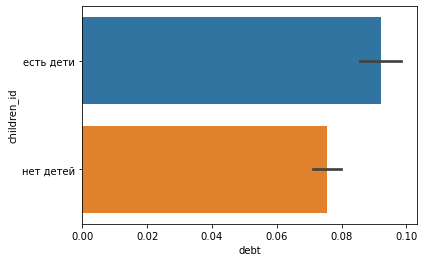

In [30]:
# построим наглядный график в виде столбчатых диаграмм, с помощью библиотеки 'seaborn'

seaborn.barplot(x=df['debt'], y=df['children_id'])

**Вывод**  
Зависимость между наличием детей и возвратом кредита в срок есть: при наличии детей, вероятность задолженности по кредиту выше: `9,2%` против `7,5%`, при отсутствии детей. Значит, бездетные клиенты более благонадёжные заёмщики.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [31]:
# сводная таблица с индексом по фамильному статусу и значением по задолженности
df_pivot_family = df.pivot_table(index = ['family_status'], values = 'debt', aggfunc=['count', my_mean])
df_pivot_family.head()

,count,my_mean
,debt,debt
family_status,,
в разводе,1195,7.11%
вдовец / вдова,959,6.57%
гражданский брак,4151,9.35%
женат / замужем,12339,7.55%
не женат / не замужем,2810,9.75%


<AxesSubplot:xlabel='debt', ylabel='family_status'>

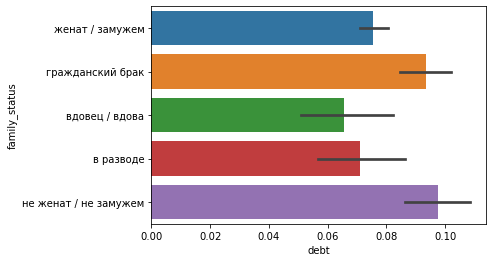

In [32]:
# столбчатая диаграмма
seaborn.barplot(x=df['debt'], y=df['family_status'])

**Вывод**  
Наблюдается следующая зависимость, в порядке убывания риска по задолжености кредита, клиенты в семейном статусе:  
1. Не женат / не замужем - самый неблагонадёжные заёмщики, вероятность задолженности по кредиту: `9,8%`;
2. Гражданский брак - на втором месте, вероятность задолженности по кредиту: `9,3%`;
3. Женат / замужем - вероятность задолженности по кредиту: `7,5%`, самая многочисленная группа;
4. В разводе - вероятность задолженности по кредиту: `7,1%`;
5. Вдовец / вдова - самые надёжные заёмщики, вероятность задолженности по кредиту: `6,5%`, самая малочисленная группа.  

Заёмщики в семейном статусе `женат / замужем` - являются самой многочисленной группой, их количество суммарно превышает все остальные, поэтому, несмотря на то, что они ровно посередине по риску наличия задолженности по кредитам, невозможно отказаться от предоставленим им услуг. В любом случае, это полезная информация, для принятия дальнейших решений.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [33]:
# сводная таблица по уровням дохода и задолженностям по кредитам
df_pivot_income = df.pivot_table(index = ['total_income_id'], values = 'debt', aggfunc=['count', my_mean])
df_pivot_income.head()

,count,my_mean
,debt,debt
total_income_id,,
110000-145000,5261,8.97%
145000-200000,5428,8.36%
до 110000,5649,8.05%
от 200000,5116,7.04%


<AxesSubplot:xlabel='debt', ylabel='total_income_id'>

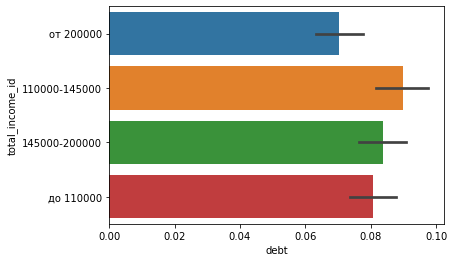

In [34]:
# столбчатая диаграмма
seaborn.barplot(x=df['debt'], y=df['total_income_id'])

**Вывод**  
Наблюдается следующая зависимость, в порядке убывания риска по задолжености кредита, клиенты в семейном статусе:  
1. Клиенты с уровнем дохода от `110000` до `145000` - самые неблагонадёжные заёмщики, вероятность задолженности по кредиту: `9,0%`;
2. От `1450000` до `200000` - на втором месте, вероятность задолженности по кредиту: `8,4%`;
3. До `110000` - вероятность задолженности по кредиту: `8,1%`;
4. От `200000` - самые надёжные заёмщики, вероятность задолженности по кредиту: `7,0%`.

Распределения достаточно ровные, во всех группах примерно одинаковое количество заёмщиков. Возможно, в дальнейшем, стоит рассмотреть другие категории по уровням дохода для выявления зависимостей и повышенных рисков.

### Как разные цели кредита влияют на его возврат в срок?

In [35]:
#сводная таблица с индексом по целям кредита и значением по задолженности
df_pivot_purpose = df.pivot_table(index = ['purpose_lemma'], values = 'debt', aggfunc=['count', my_mean])
df_pivot_purpose.head()

,count,my_mean
,debt,debt
purpose_lemma,,
автомобиль,4306,9.36%
недвижимость,10811,7.23%
образование,4013,9.22%
свадьба,2324,8.00%


<AxesSubplot:xlabel='debt', ylabel='purpose_lemma'>

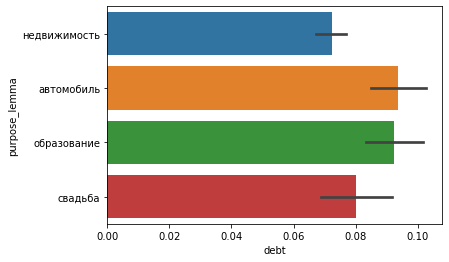

In [36]:
# столбчатая диаграмма
seaborn.barplot(x=df['debt'], y=df['purpose_lemma'])

**Вывод**  
Наблюдается следующая зависимость, в порядке убывания риска по задолжености кредита, по целям кредита:  
1. Автомобиль - самая неблагонадёжная цель, вероятность задолженности по кредиту: `9,4%`;
2. Образование - на втором месте, вероятность задолженности по кредиту: `9,2%`, самая малочисленная группа;
3. Свадьба - вероятность задолженности по кредиту: `8,0%`;
4. Недвижимость - самая выгодная цель, вероятность задолженности по кредиту: `7,2%`, и это самая многочисленная группа.
  

## Общий вывод

В ходе исследования надёжности заемщиков были изучены и обработаны полученные данные: заменены пропущенные и справлены некорректные значения, удалены дубликаты, выполнена категоризация заёмщиков банка по разным параметрам.  

Если есть возможность обратной связи с заказчиком - можно рекомендовать сделать ввод данных в столбец уровня образования выпадающим списком, для дальнейшей корректной обработки данных и исключения ошибок при вводе данных клиентов банка.
Так же, желательно сделать уточнение по данным в столбце с общим трудовым стажем в днях, он заполнен некорректно.

Примерный портет идеального клиента банка (без учёта количества трудового стажа, возраста, уровня образования, гендера и типа занятости): бездетный (`7,5%` невозврата кредита в срок) вдовец (`6,5%`), берущий кредит на недвижимость (`7,2%`) и имеющий доход от `200000` (`7,0%`).  

И, портрет самого рискового клиента: не женатый (`9,8%` невозврата кредита в срок), с детьми (`9,2%`), кредит на автомобиль (`9,4%`) и имеющий уровень дохода от `110000` до `145000` (`9,0%`).  

Несмотря на то, что заёмщики, имещие семейный статус `женат / замужем` являются не самыми благонадёжными, находясь ровно посередине рейтинга риска возникновения задолженности по кредиту - `7,5%`, они составляют основную часть клиентов банка (`12339` человек или `57%`).